# **Деревья решений**

В этом юните мы познакомимся с ещё одним семейством моделей машинного обучения — **деревьями решений**. Для начала поговорим о том, что такое дерево решений и как с его помощью решают задачу классификации.

Деревья решений являются одним из наиболее понятных человеку и в то же время мощных алгоритмов принятия решений. К тому же на их основе строятся самые эффективные ансамблевые модели машинного обучения, такие как **случайный лес**, о котором мы поговорим далее.

Алгоритмы на основе деревьев решений могут использоваться как для решения задач классификации, так и для регрессии. В этом модуле мы разберём задачу классификации, а в дальнейшем, когда будем разбирать математическую составляющую алгоритмов, поговорим о том, как научить дерево решать задачу регрессии.

>Если коротко, решающее дерево предсказывает значение целевой переменной с помощью применения последовательности простых решающих правил. Этот процесс в некотором смысле согласуется с естественным для человека процессом принятия решений.

## ОБЩЕЕ ПРЕДСТАВЛЕНИЕ О ДЕРЕВЕ РЕШЕНИЙ

Начнём сразу с примера.

Представьте, что у вас есть автомобиль, который вы решили застраховать. Вы приходите в страховую компанию, где вам дают заполнить анкету. По этой анкете сотрудник страховой компании будет принимать решение, стоит ли выдавать вам страховку.

Сотрудник в свою очередь будет руководствоваться примерно следующим регламентом:

* Если возраст владельца > 40 лет, то:

* * Если место эксплуатации автомобиля — город, то:

* * * Если стаж > 10 лет, то:

* * * * Застраховать.

* * * Если стаж < 10 лет, то:

* * * * Не страховать.

* *  Если место эксплуатации автомобиля — сельская местность, то:

* * * Застраховать.

* * Если возраст владельца ≤ 40 лет, то:

* * * Если аварий не было зафиксировано, то:

* * * * Застраховать.

* *  Если были аварии, то:

* * * Если тип автомобиля — минивэн, то:

* * * * Застраховать.

* * * Если тип автомобиля — спорткар, то:

* * * * Не страховать.

То есть сотрудник при принятии решения использует информацию, предоставленную вами в анкете, и подает её на вход вложенного условного оператора.

Для простоты восприятия можно представить такой подход визуально в виде следующего дерева:

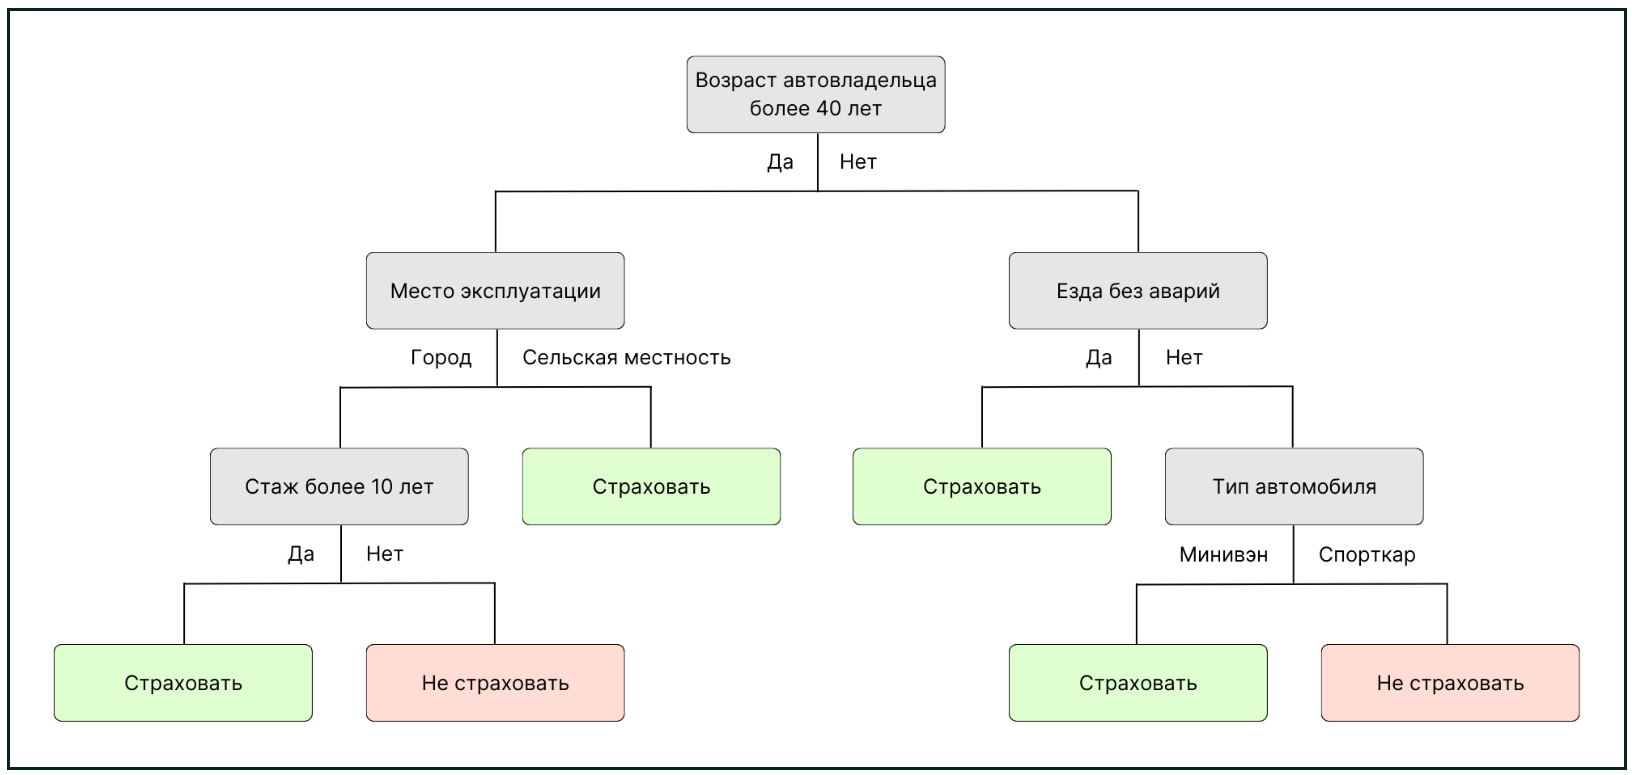

Аналогичным образом работает и алгоритм машинного обучения под названием **«дерево решений» (Decision Tree)**. 

Если дерево уже обучено, то есть уже сформулированы условия в прямоугольниках, то, когда в страховую компанию придёт новый автовладелец, сотруднику будет достаточно прогнать данные клиента через дерево решений и таким образом принять решение, то есть произвести классификацию.

>Вот ещё один пример дерева решений. Большинство из нас когда-нибудь играли в игру «Слова на лбу» или «Тарантинки». На лоб каждого из игроков приклеивается бумажка с написанным на ней словом. Игрок может задавать другим игрокам вопросы о загаданном ему предмете/животном/человеке и т. д. Другие игроки могут отвечать на вопросы только «Да» и «Нет». Цель — за минимальное количество вопросов догадаться, о чём идёт речь.

Логика «если …, то …» используется людьми повседневно и поэтому интуитивно понятна каждому из нас. На основании этих рассуждений можно построить мощный алгоритм машинного обучения.

Деревья решений находят своё применение во множестве прикладных задач.

Успешнее всего деревья применяют в следующих областях:

* **Банковское дело**. Оценка кредитоспособности клиентов банка при выдаче кредитов.
* **Промышленность**. Контроль качества продукции (обнаружение дефектов в готовых товарах), испытания без нарушений (например, проверка качества сварки) и т. п.
* **Медицина**. Диагностика заболеваний разной сложности.
* **Молекулярная биология**. Анализ строения аминокислот.
* **Торговля**. Классификация клиентов и товара.

Теперь перейдём к формальной части. Нам важно уже сейчас познакомиться с терминологией деревьев решений, чтобы понять общий принцип их обучения.

Пусть у нас есть всё та же матрица наблюдений `X`, в которой содержатся наблюдения и характеризующие их признаки (привычный нам DataFrame), и правильные ответы `y` — метки классов. 

Дадим определение дереву решений и его составляющим ↓

Формально структура дерева решений — это **связный ациклический граф**. Что это значит?

>**Граф** — это абстрактная топологическая модель, которая состоит из вершин и соединяющих их рёбер.

>**Связный граф** — это граф, в котором между любой парой существует направленная связь.

>**Ациклический граф** — это граф, в котором отсутствуют циклы, то есть в графе не существует такого пути, по которому можно вернуться в начальную вершину.

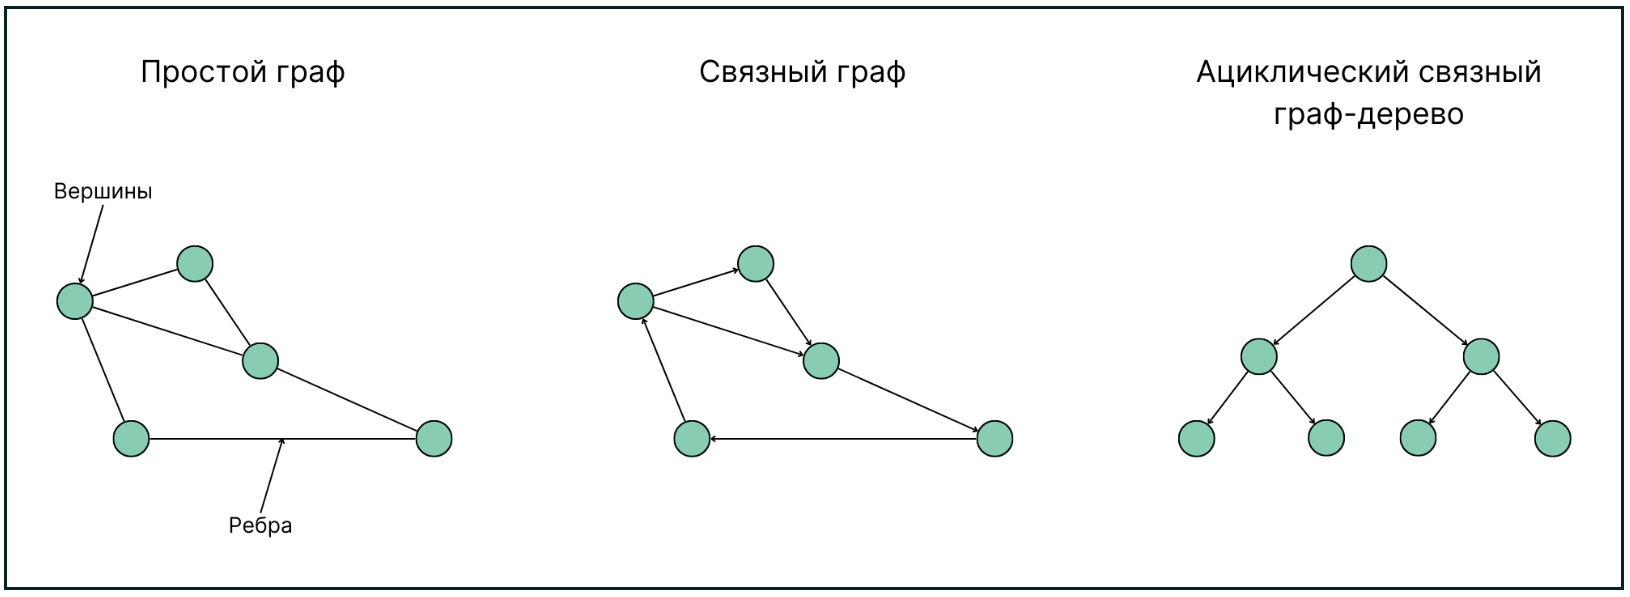

**Примечание**. Рекомендуем вам запомнить данное лаконичное определение дерева — так вы сможете показать свой уровень знаний перед будущим работодателем.

В дереве решений можно выделить три типа вершин:

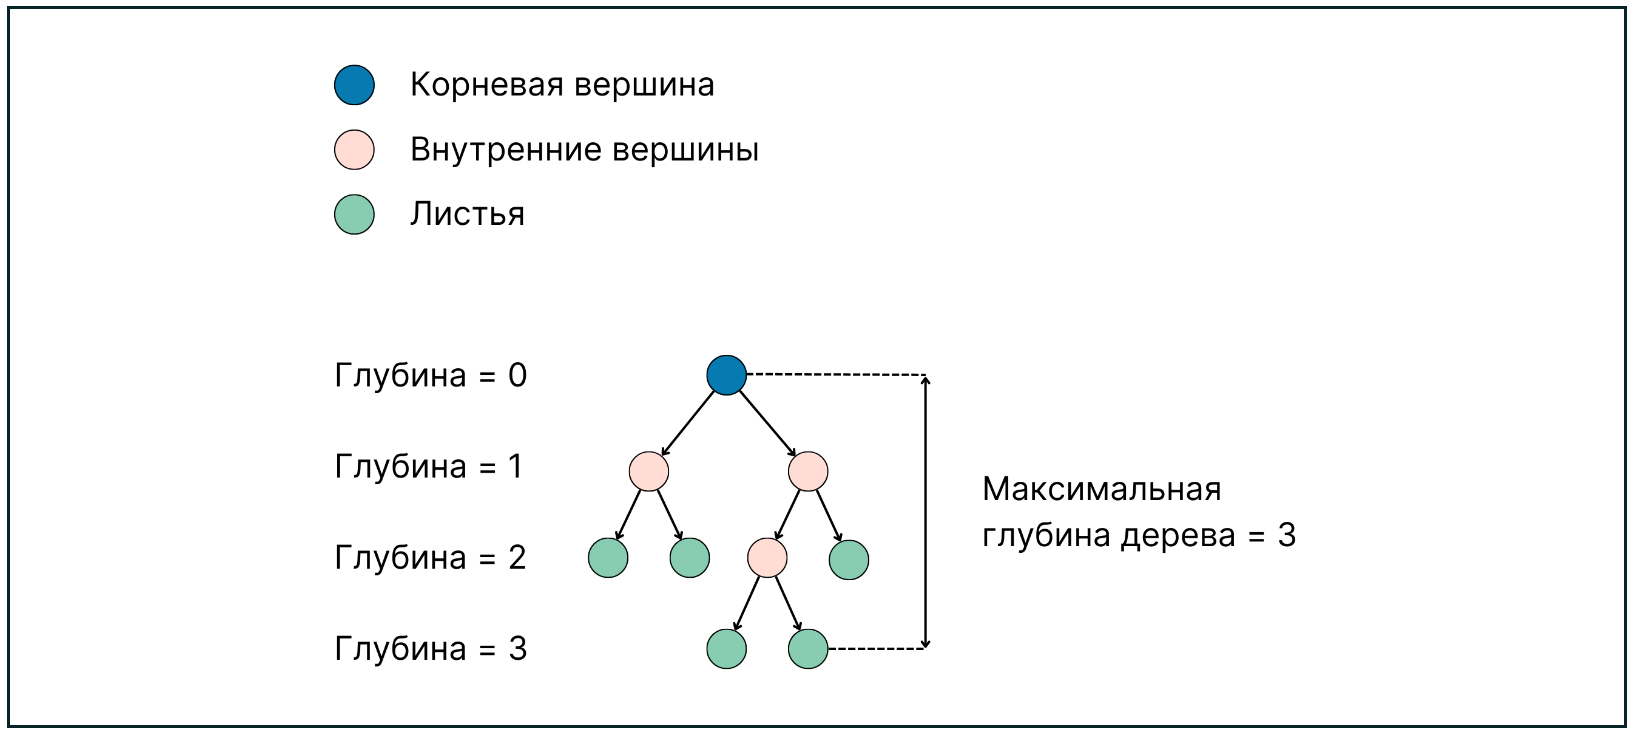

* **Корневая вершина (root node)** — то, откуда всё начинается. Это первый и самый главный вопрос, который дерево задаёт объекту. В примере со страхованием это был вопрос «Возраст автовладельца > 40».
* **Внутренние вершины (intermediate nodes)** — это дополнительные уточняющие вопросы, которые дерево задаёт объекту. 
* **Листья (leafs)** — конечные вершины дерева. Это вершины, в которых содержится конечный «ответ» — класс объекта.

>Максимально возможная длина от корня до самых дальних листьев (не включая корневую) называется **максимальной глубиной дерева (max depth)**.

Во внутренней или корневой вершине признак проверяется на некий логический критерий, по результатам которого мы движемся всё глубже по дереву. Например, «Количество кредитов  1». 

>Логический критерий, который находится в каждой вершине, называется предикатом, или решающим правилом.

На самом деле все предикаты — это просто взятие порога по значению какого-то признака. Формально это записывается следующим образом:\

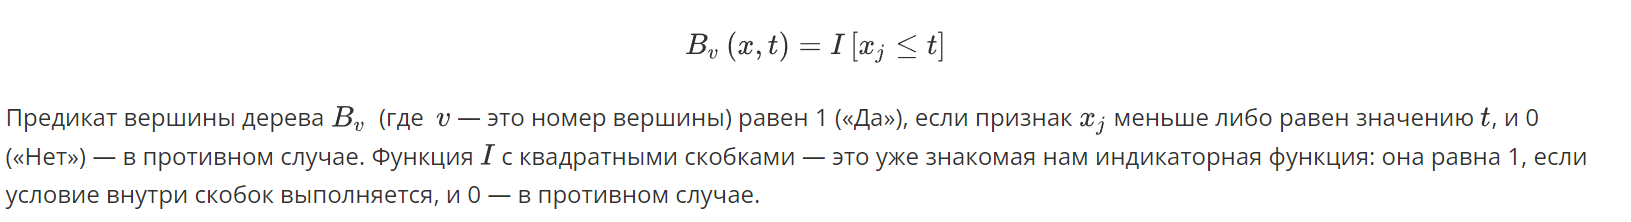

Примечание. В зависимости от реализации предикат может быть с условием $\le$ или $\ge$. В реализации *sklearn* используется условие $\le$. Но вы можете встретить другую формулировку предикатов в иных реализациях или в литературе.

Если результат предиката равен 1, то мы переходим по левой ветви дерева к следующему узлу, в противном случае — по правой ветви дерева к следующему узлу.

**А что насчёт геометрии?**

Каждый новый вопрос дерева решений при его обучении разбивает пространство признаков на две части: в первую часть отправляются наблюдения, для которых предикат истинен, а во вторую — для которых он ложен.

Посмотрим, как это будет выглядеть, на примере. 

___

Вам уже знакома задача классификации про ирисы. Ирисы Фишера — это задача, на которой Рональд Фишер ещё в 1936 году (почти 100 лет назад!) продемонстрировал работу алгоритма, разделяющего ирисы на сорта в зависимости от параметров долей околоцветника.

Пусть у нас есть следующие признаки:

* длина внутренней доли околоцветника (англ. petal length);
* ширина внутренней доли околоцветника (англ. petal width).

На основании этих двух признаков требуется разделить ирисы на три сорта:

* ирис щетинистый (Iris Setosa);
* ирис виргинский (Iris virginica);
* ирис разноцветный (Iris versicolor).

Пусть мы обучили на этих данных дерево решений с максимальной глубиной 2. Оно получилось вот таким:

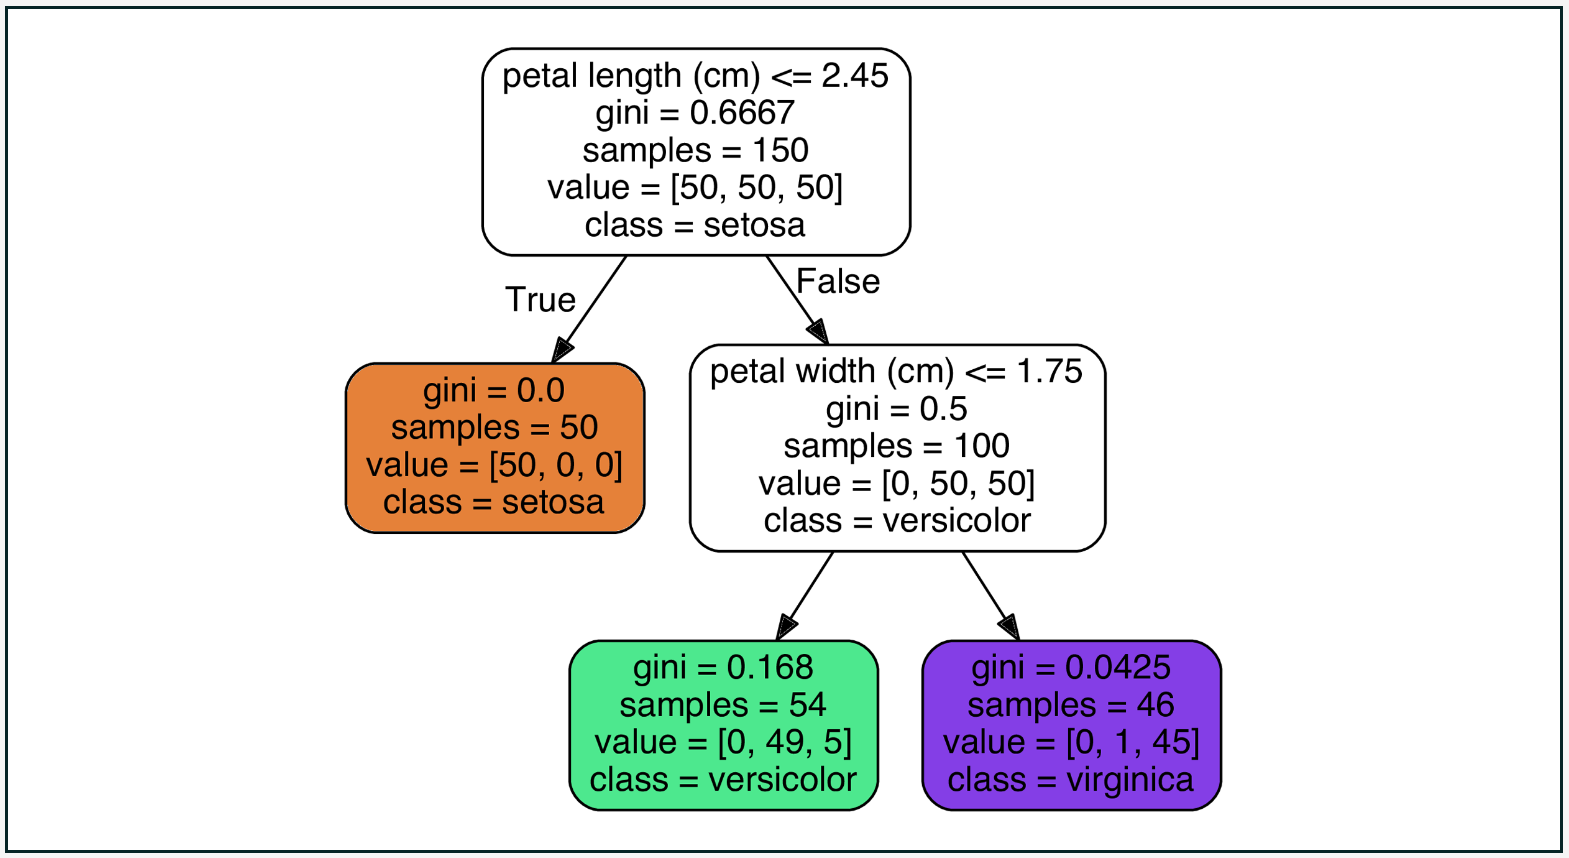

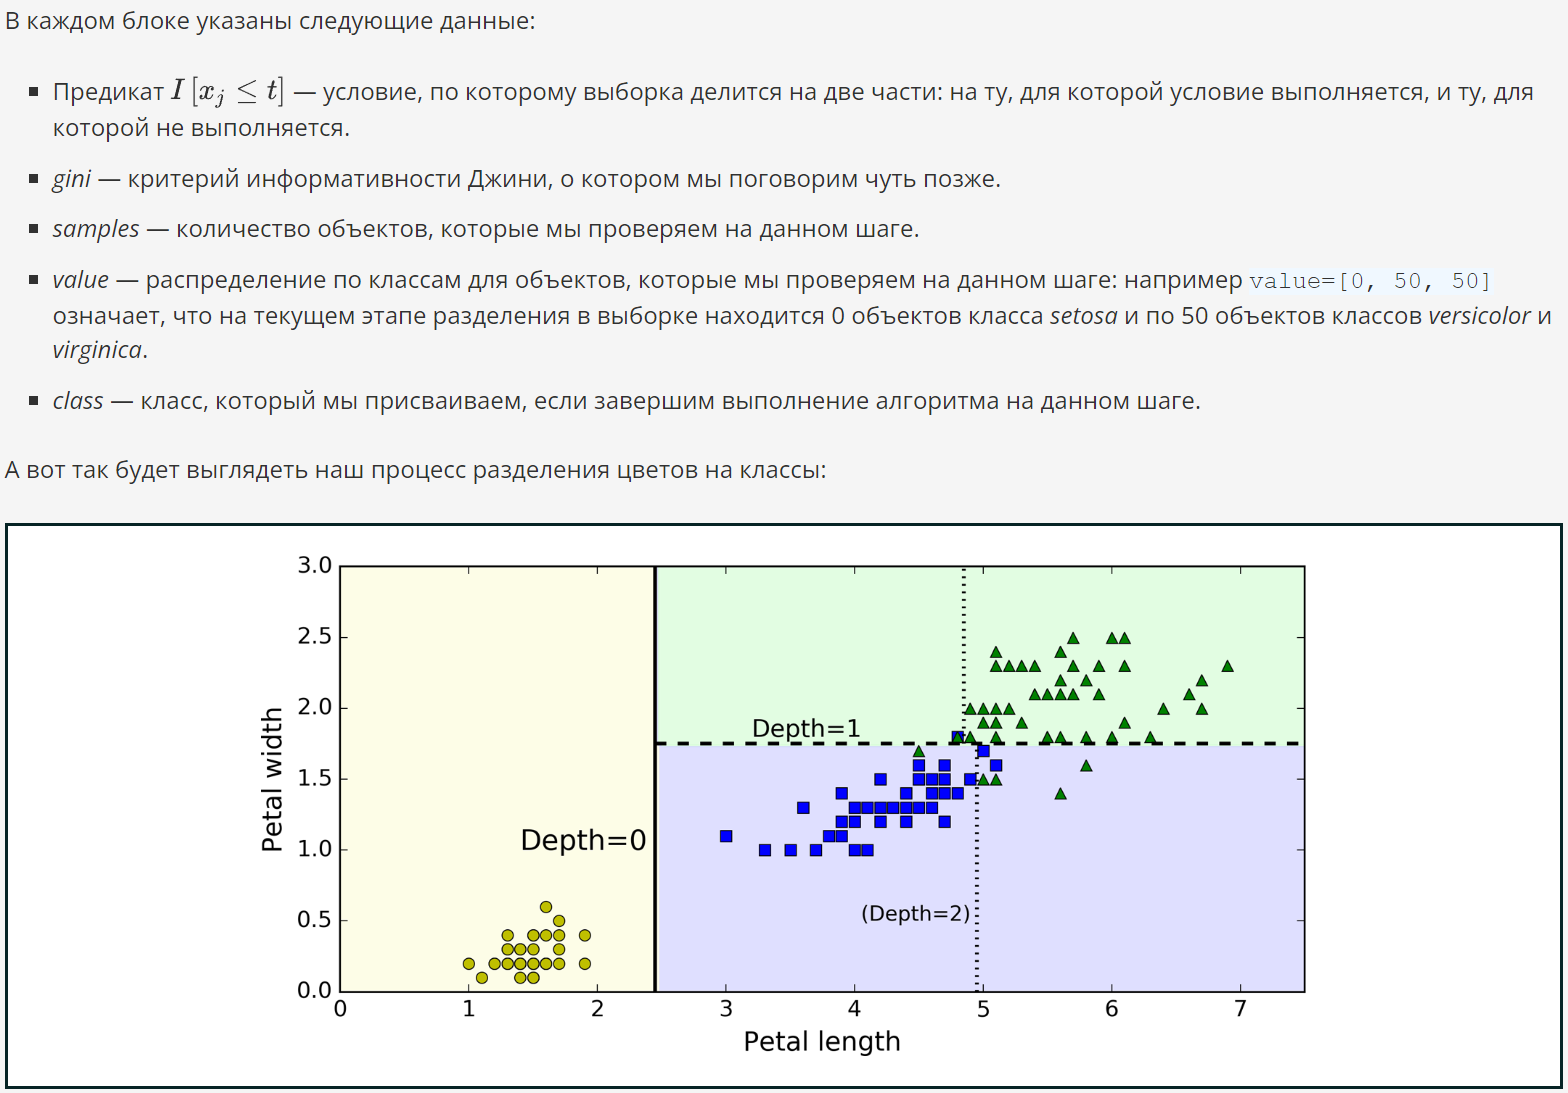

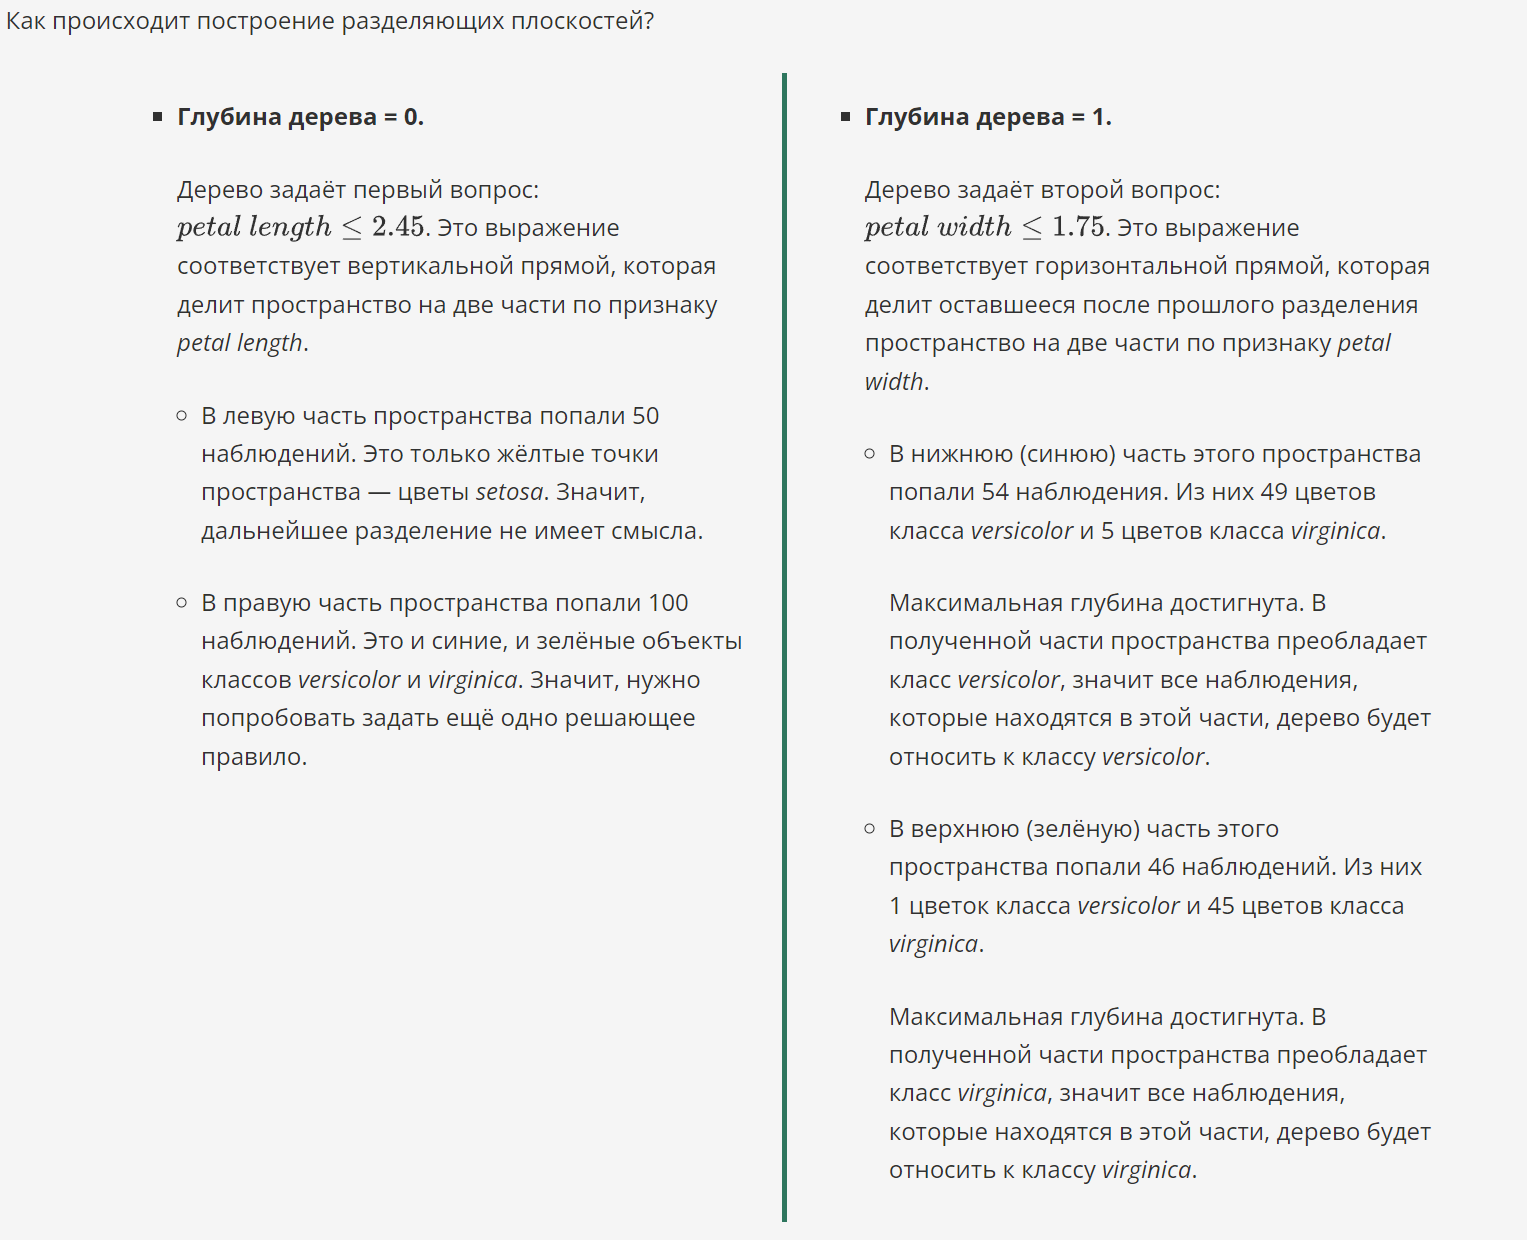

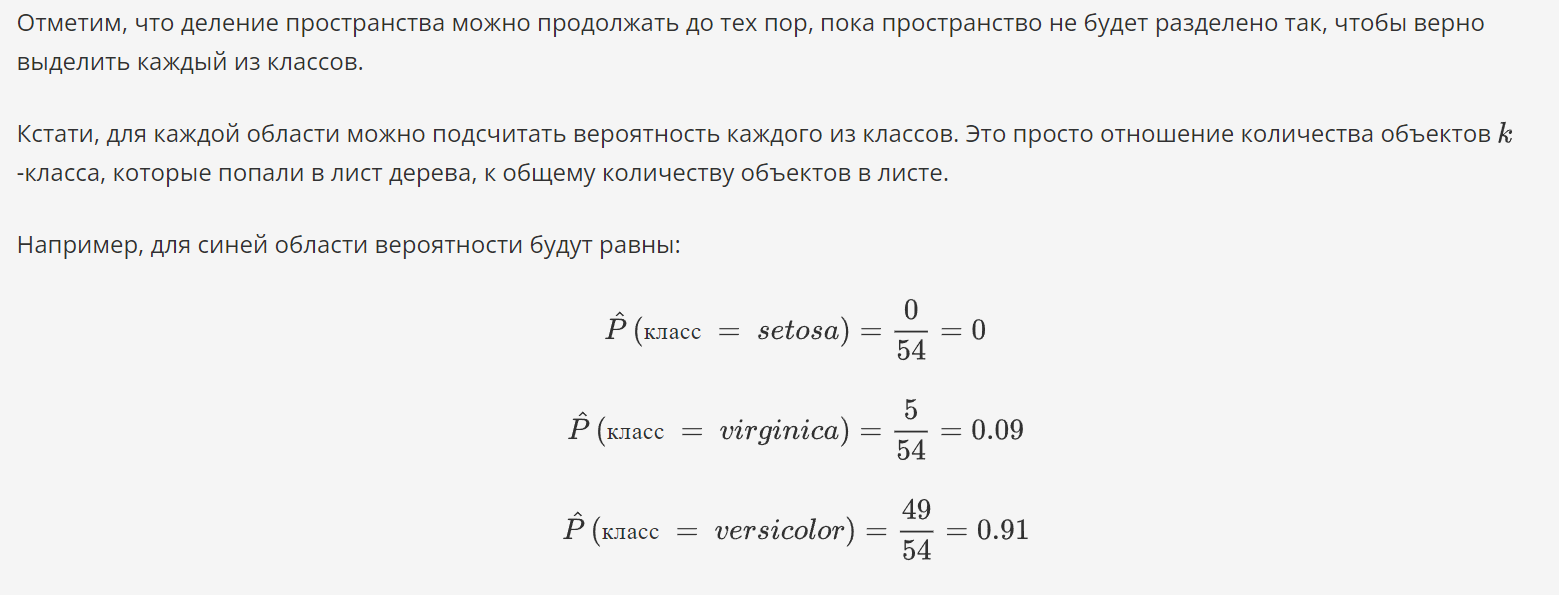

## ПРОЦЕСС ПОСТРОЕНИЯ ДЕРЕВА РЕШЕНИЙ

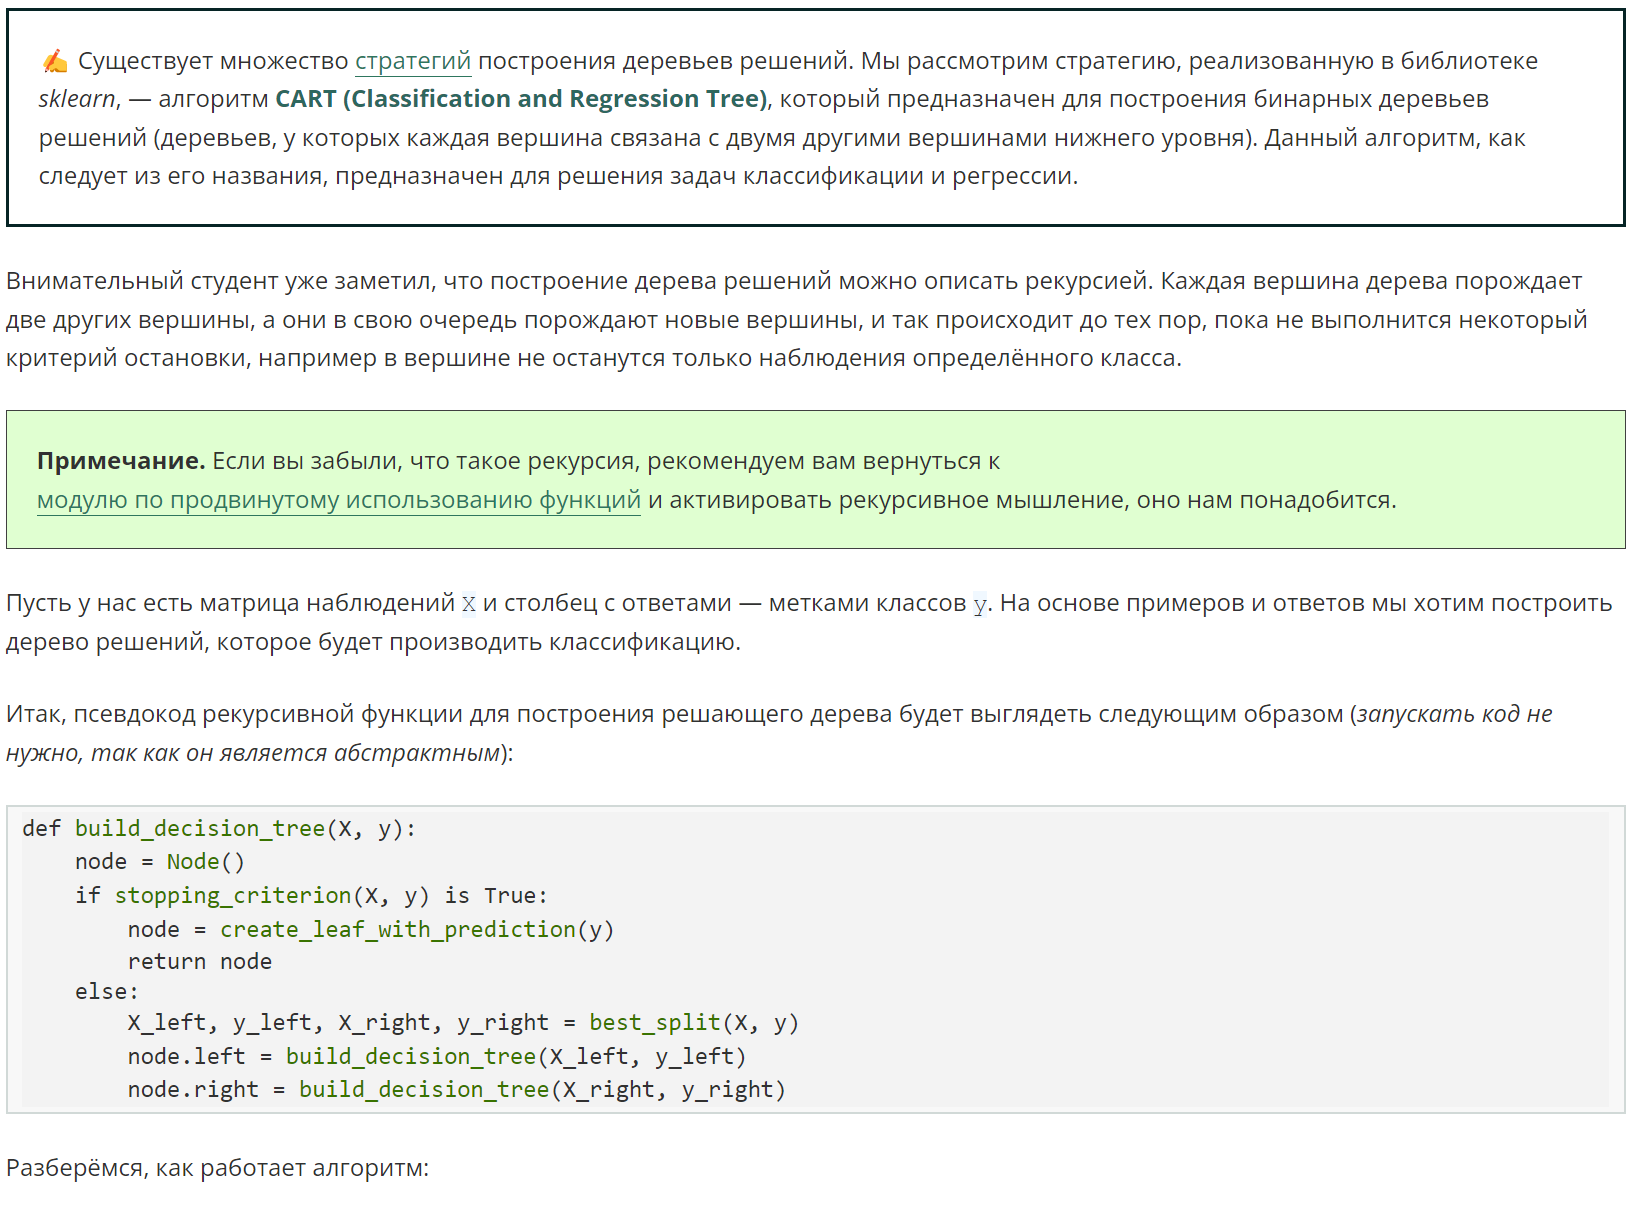

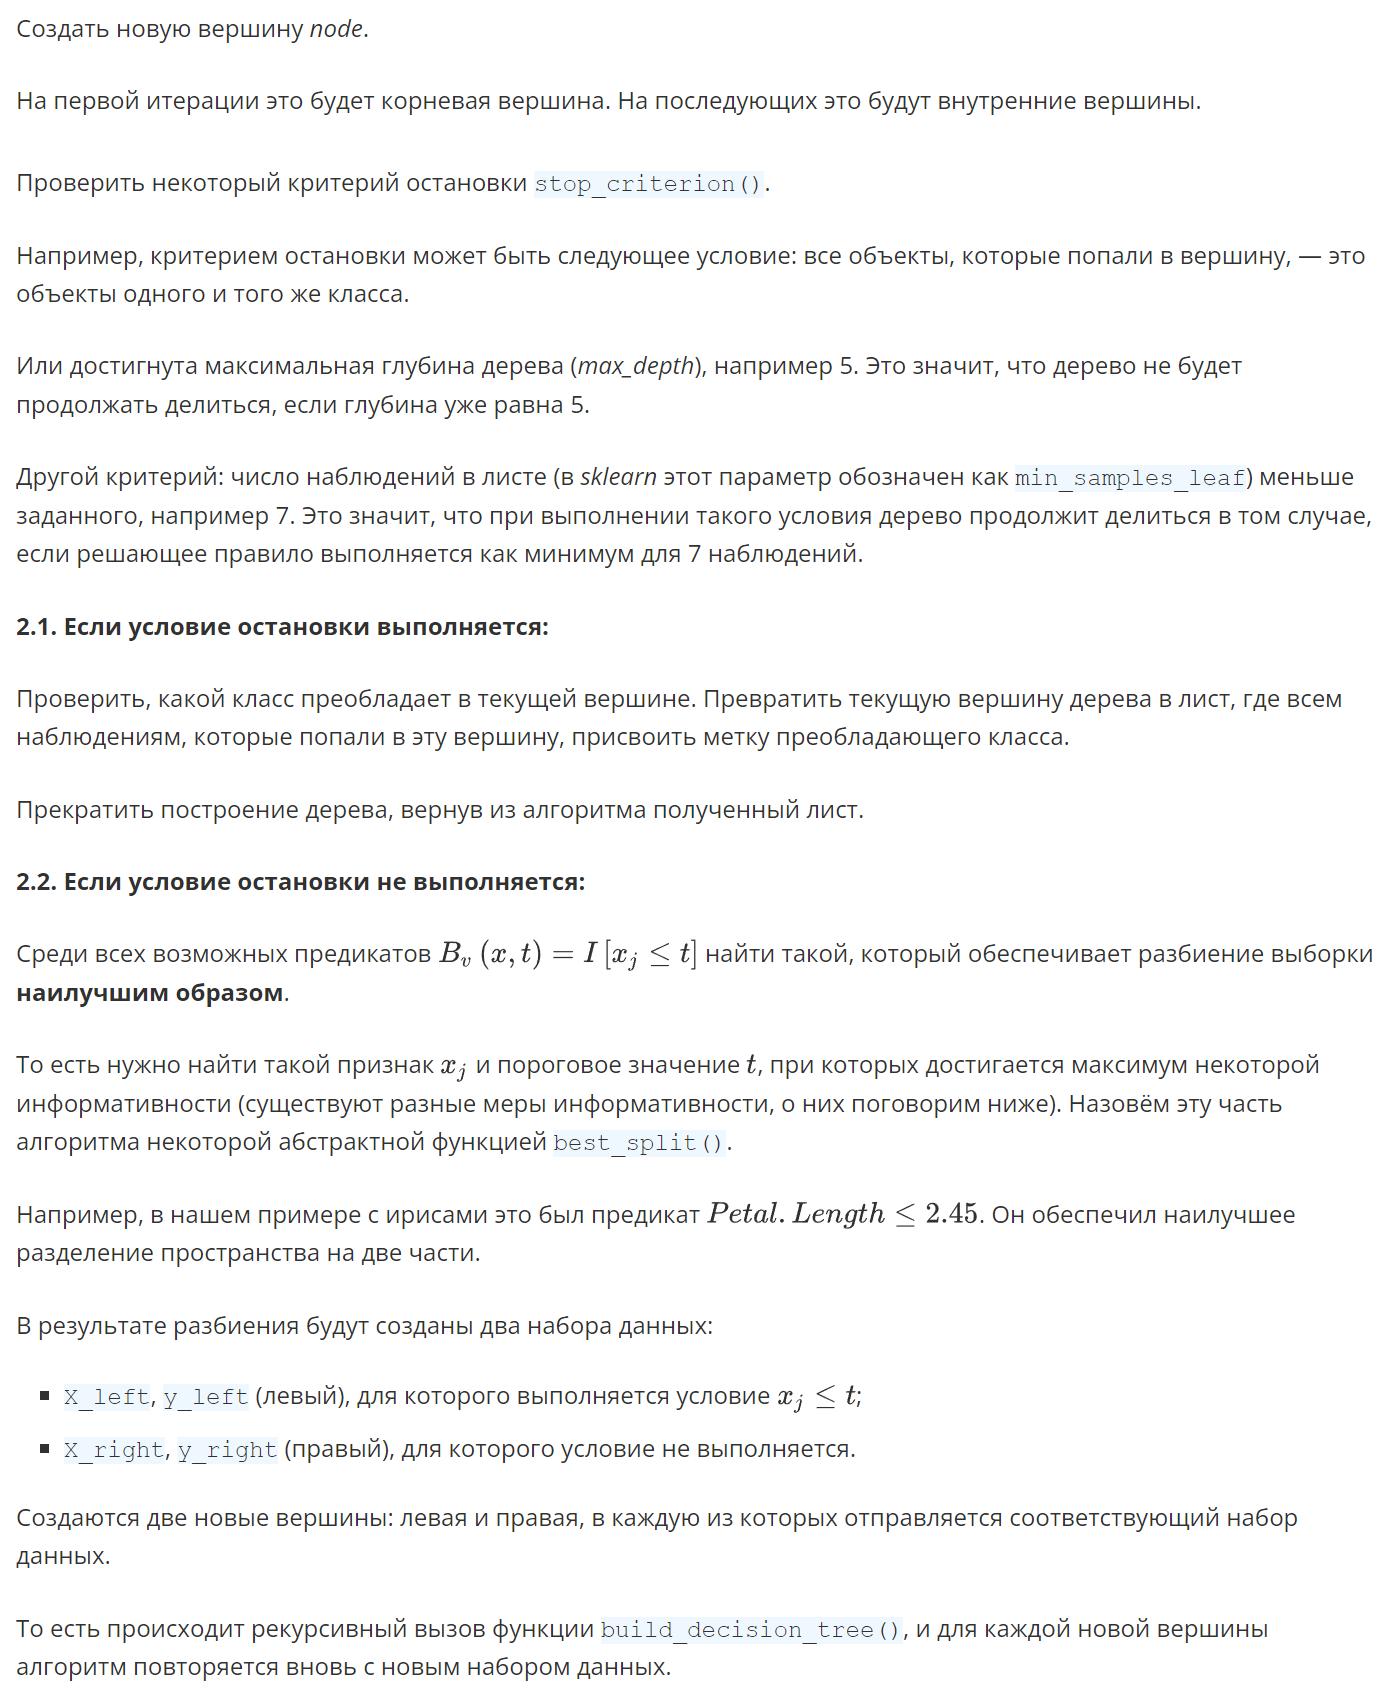

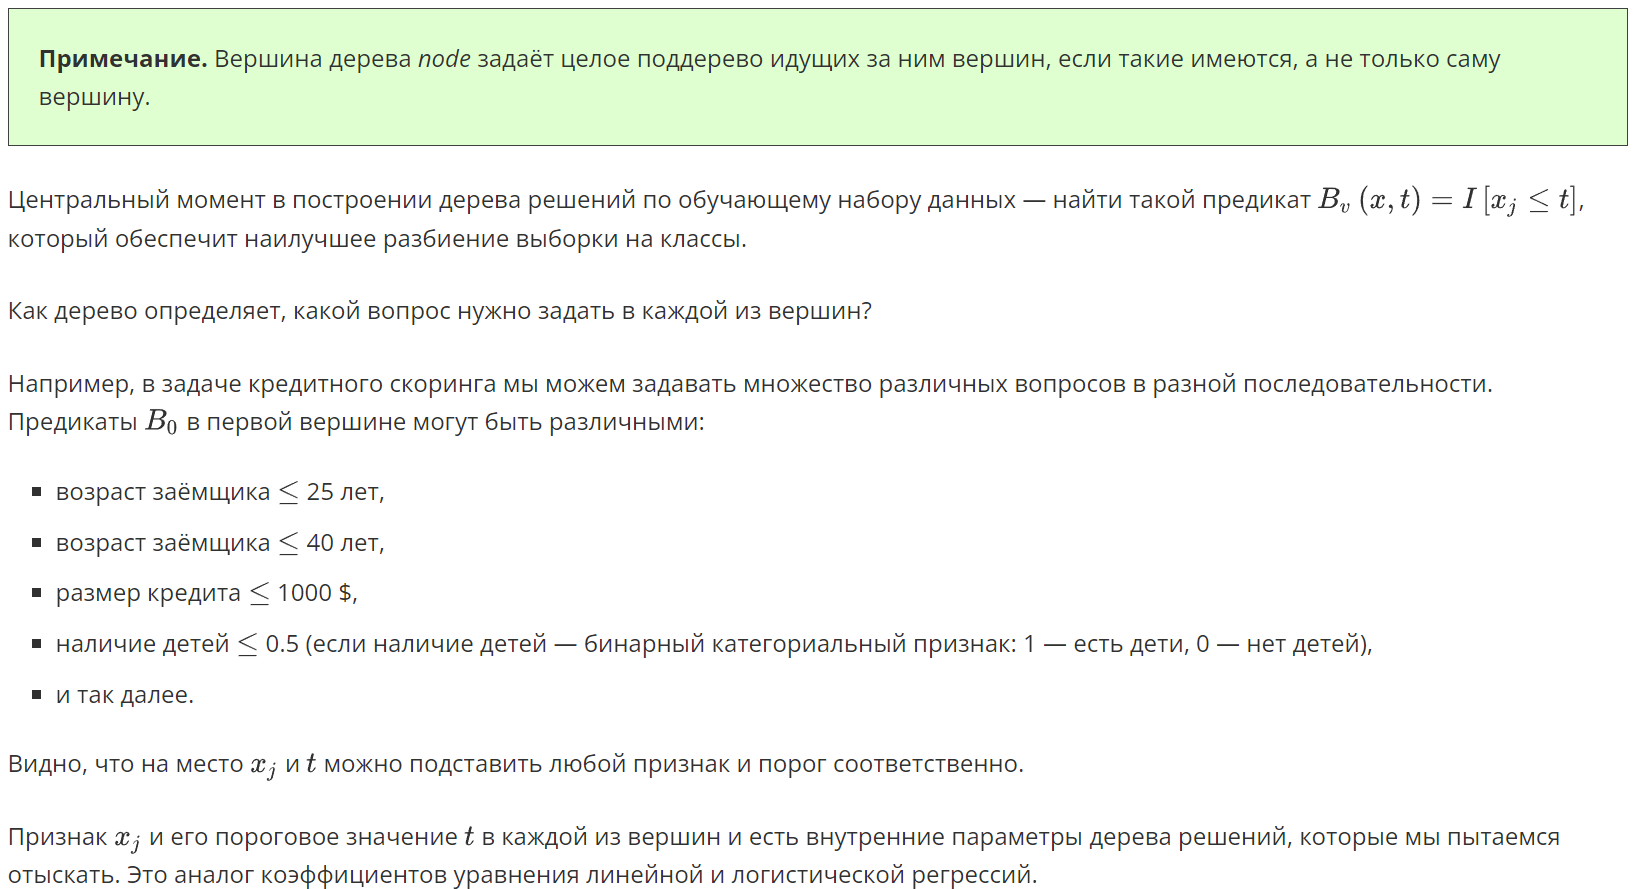

## ПОИСК ПАРАМЕТРОВ ДЕРЕВА РЕШЕНИЙ

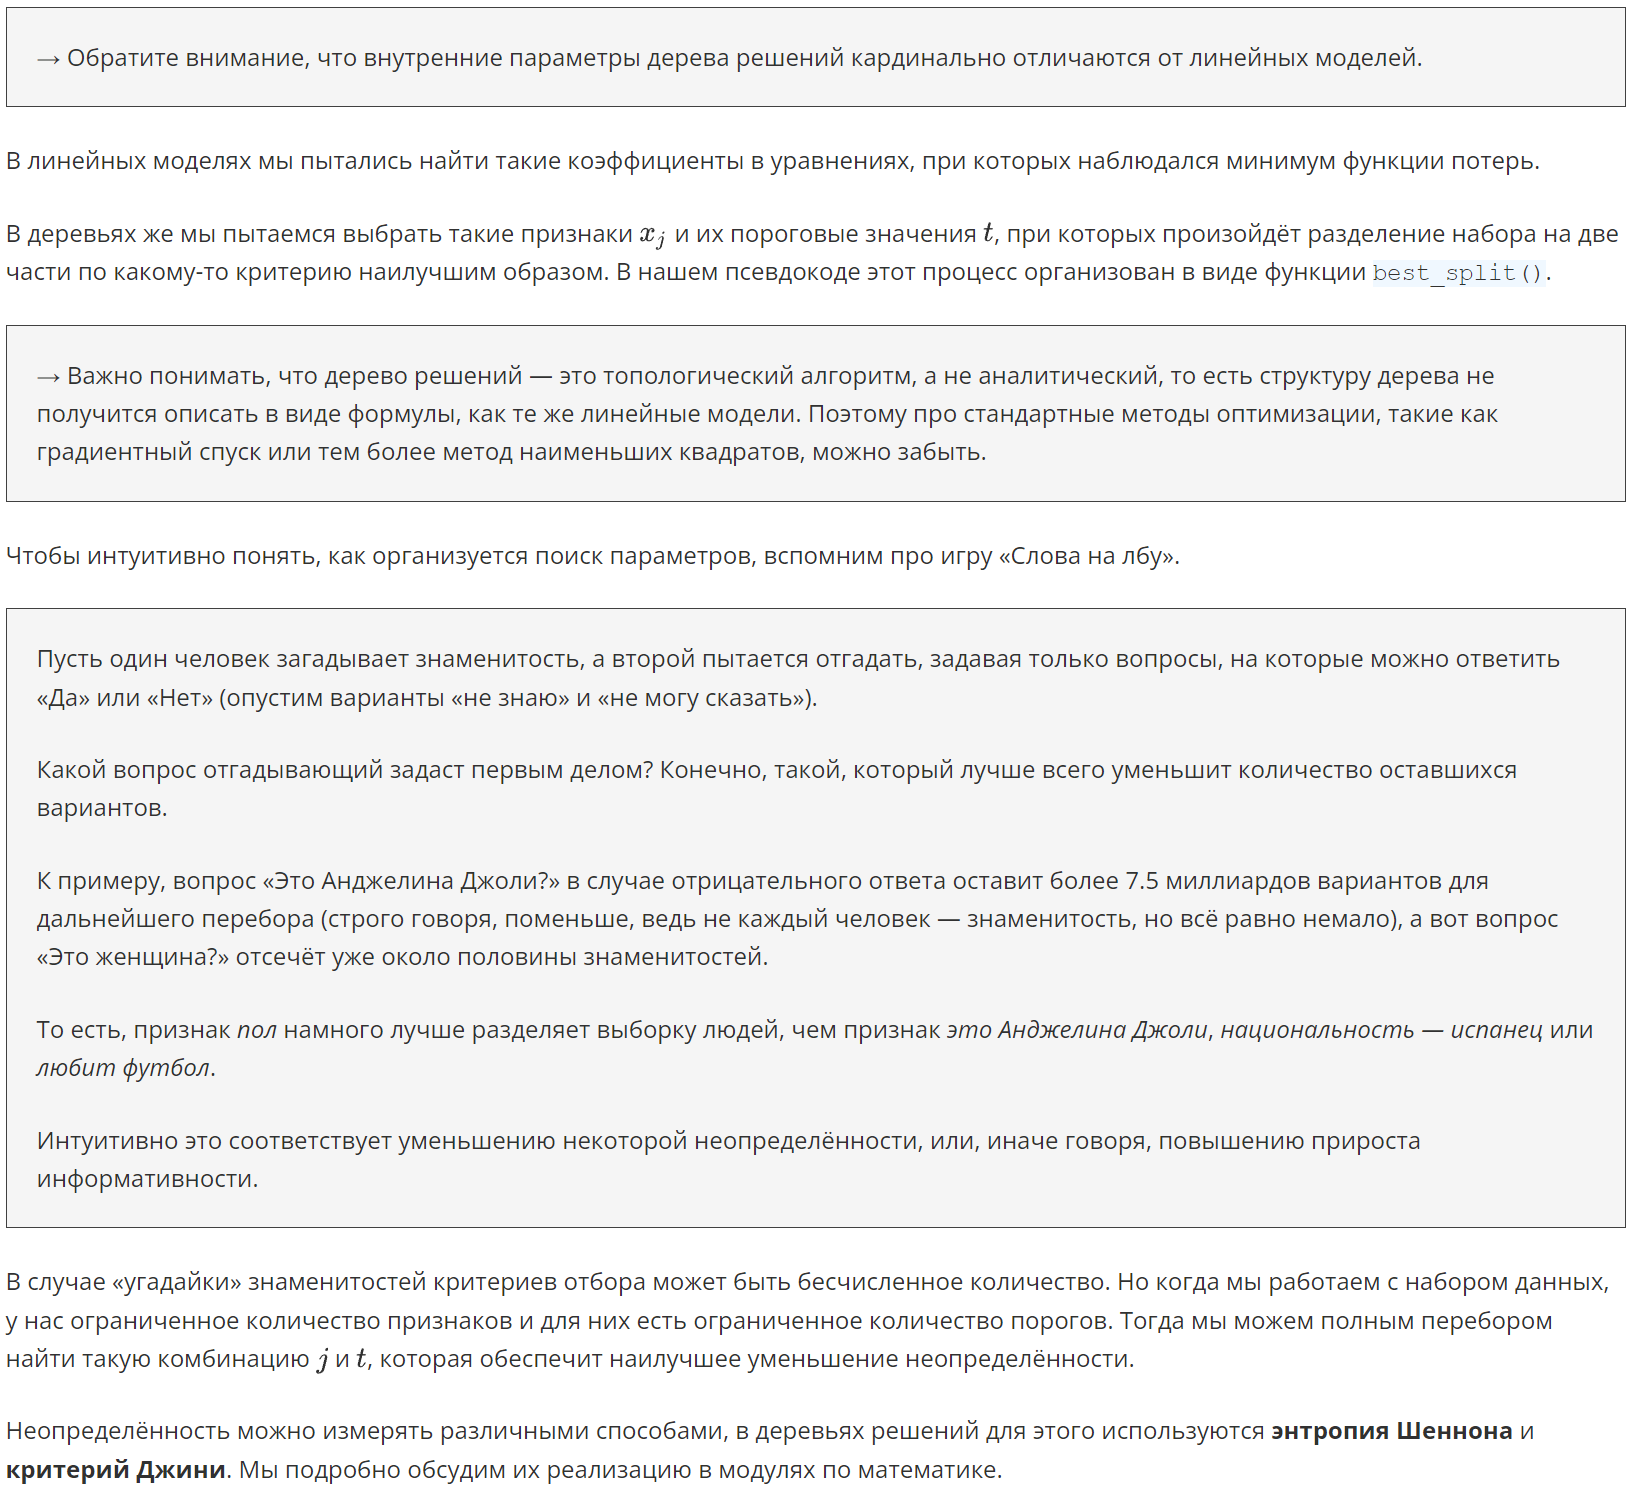